# Evaluate the performance of the models

In [17]:
# import all of the packages that will be used

# basic packages for data processing
import pandas as pd
import numpy as np

# packege for calculation
import math

# packages for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# packages to interpret the training result
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# package to benchmark the CPU running time
from time import process_time

# silent the warning from sklearn package
import warnings
warnings.filterwarnings('ignore')

# set the random seed to ensure the result is reproducible
import random
random.seed(10)
np.random.seed(10)

In [18]:
features = pd.read_csv('Dataset/features_selected/LUFlow_RandomForestClassifier_11.csv').squeeze()
features = features[:6]

## Load the dataset

In this notebook, both the training dataset and the testing dataset are used. 

In [19]:
columns = features.tolist() +  ['label']

luflow_2020 = pd.read_csv('Dataset/dataset_cleaned/LUFlow.csv', usecols=columns)
luflow_2020.shape

(1759480, 7)

In [20]:
luflow_2021 = pd.read_csv('Dataset/dataset_cleaned/LUFlow2021.csv', usecols=columns)
luflow_2021.shape

(1138006, 7)

## Additional Processing

### Split the features and the labels

Split the features and the output variable. The LUFlow 2020 dataset will be further split into training and testinng dataset to compare the accuracy with the LUFlow 2021 dataset. 

In [21]:
luflow_2020 = luflow_2020.sample(frac=0.2).reset_index(drop=True)
luflow_2021 = luflow_2021.sample(frac=0.2).reset_index(drop=True)

In [22]:
luflow_2020_X = luflow_2020.drop('label', axis=1).copy()
luflow_2020_y = luflow_2020['label'].copy()

luflow_2020_train_X, luflow_2020_test_X, luflow_2020_train_y, luflow_2020_test_y = train_test_split(luflow_2020_X, luflow_2020_y, test_size=0.3)

In [23]:
luflow_2021_X = luflow_2021.drop('label', axis=1).copy()
luflow_2021_y = luflow_2021['label'].copy()

### Data scaling

In [24]:
scalar = StandardScaler()
# only fit the training data
luflow_2020_train_X_scaled = scalar.fit(luflow_2020_train_X)

luflow_2020_train_X_scaled = scalar.transform(luflow_2020_train_X)
luflow_2020_test_X_scaled = scalar.transform(luflow_2020_test_X)
luflow_2021_X_scaled = scalar.transform(luflow_2021_X)

## Build the ultimate models

Build the models with optimal hyperparameters. 

In [25]:
# define the models with optimal hyperparameter retrived in Step 3
models = {
    'Decision Tree': tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.00013808459751681997),
    'Random Forest': RandomForestClassifier(n_jobs=-1,criterion='gini', max_depth=10, min_samples_leaf=0.00005, min_samples_split=12, n_estimators=300),
    'Support Vector Machine': SVC(C=100, gamma=1, kernel='rbf'),
    'Naive Bayes': GaussianNB(var_smoothing=8.111308307896873e-06),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(40,), activation='relu', solver='adam', alpha=0.001, max_iter=500),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='tanh', solver='adam', alpha=1e-05, max_iter=500)
}

------------------------- Decision Tree -------------------------
              precision    recall  f1-score   support

      benign     0.9996    0.9993    0.9994     52627
   malicious     0.9993    0.9996    0.9994     52942

    accuracy                         0.9994    105569
   macro avg     0.9994    0.9994    0.9994    105569
weighted avg     0.9994    0.9994    0.9994    105569

------------------------- Random Forest -------------------------
              precision    recall  f1-score   support

      benign     0.9995    0.9993    0.9994     52627
   malicious     0.9993    0.9995    0.9994     52942

    accuracy                         0.9994    105569
   macro avg     0.9994    0.9994    0.9994    105569
weighted avg     0.9994    0.9994    0.9994    105569

------------------------- Support Vector Machine -------------------------
              precision    recall  f1-score   support

      benign     0.9954    0.9957    0.9956     52627
   malicious     0.9958    0.9

Text(0.5, 0.98, 'Confusion matrix of each model on LUFlow dataset (2020)')

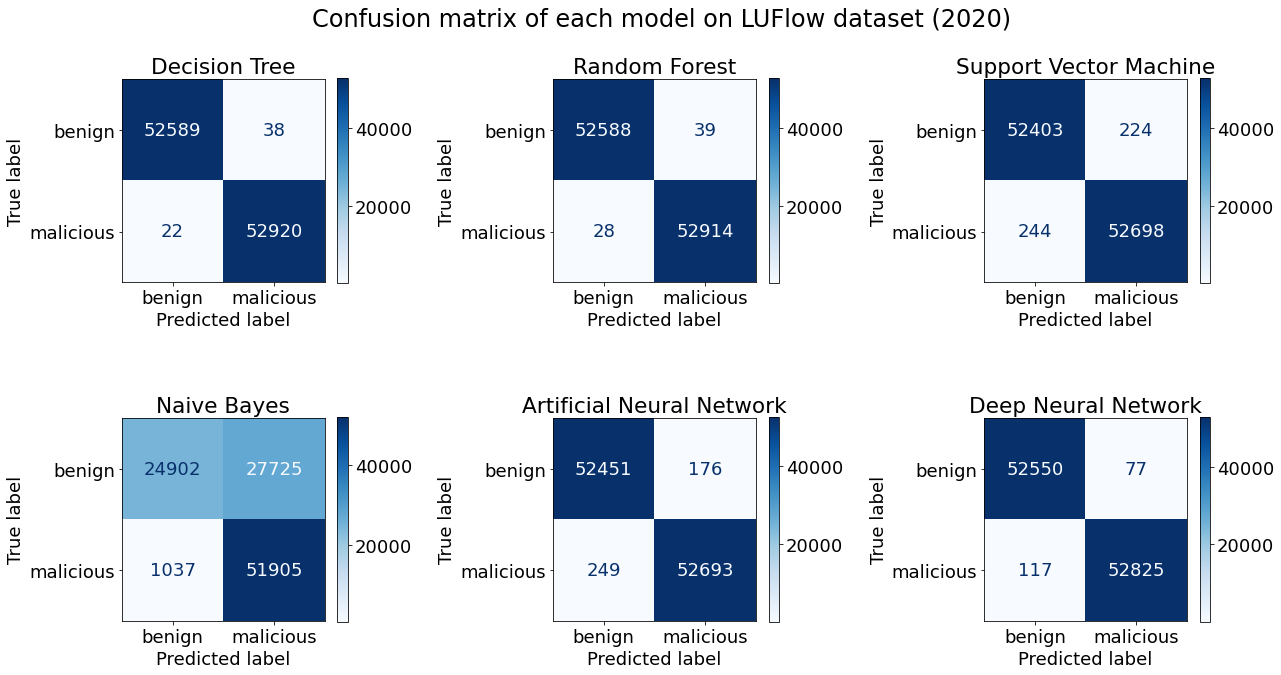

In [26]:
trained_models = {}
training_time = {}
accuracy_train_dataset = {}
f_score_train_dataset = {}

plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (model, clf) in enumerate(models.items()):

    training_start_time = process_time()
    clf.fit(luflow_2020_train_X_scaled, luflow_2020_train_y)

    # save the training time
    training_time[model] = process_time() - training_start_time

    # save the trained model
    trained_models[model] = clf

    prediction = clf.predict(luflow_2020_test_X_scaled)
    model_report = metrics.classification_report(luflow_2020_test_y, prediction, digits=4, output_dict=True)

    # save the accuracy and the f1-score of each model
    accuracy_train_dataset[model] = model_report['accuracy']
    f_score_train_dataset[model] = model_report['weighted avg']['f1-score']

    print(f"{'-'*25} {model} {'-'*25}")
    print(metrics.classification_report(luflow_2020_test_y, prediction, digits=4))
    
    plot_confusion_matrix(clf, 
                            luflow_2020_test_X_scaled, 
                            luflow_2020_test_y, 
                            cmap=plt.cm.Blues,
                            ax=axes[math.floor(i/3)][i%3])

    axes[math.floor(i/3)][i%3].set_title(model)


fig.subplots_adjust(hspace=0.65, wspace=0.7)
fig.suptitle('Confusion matrix of each model on LUFlow dataset (2020)', fontsize=24)

## Evaluate the model using LUFlow2021 dataset

------------------------- Decision Tree -------------------------
              precision    recall  f1-score   support

      benign     0.9994    0.9986    0.9990    114096
   malicious     0.9986    0.9994    0.9990    113505

    accuracy                         0.9990    227601
   macro avg     0.9990    0.9990    0.9990    227601
weighted avg     0.9990    0.9990    0.9990    227601

------------------------- Random Forest -------------------------
              precision    recall  f1-score   support

      benign     0.9995    0.9986    0.9991    114096
   malicious     0.9986    0.9995    0.9990    113505

    accuracy                         0.9991    227601
   macro avg     0.9991    0.9991    0.9991    227601
weighted avg     0.9991    0.9991    0.9991    227601

------------------------- Support Vector Machine -------------------------
              precision    recall  f1-score   support

      benign     0.9882    0.9989    0.9935    114096
   malicious     0.9988    0.9

Text(0.5, 0.98, 'Confusion matrix of each model on LUFlow dataset (2021)')

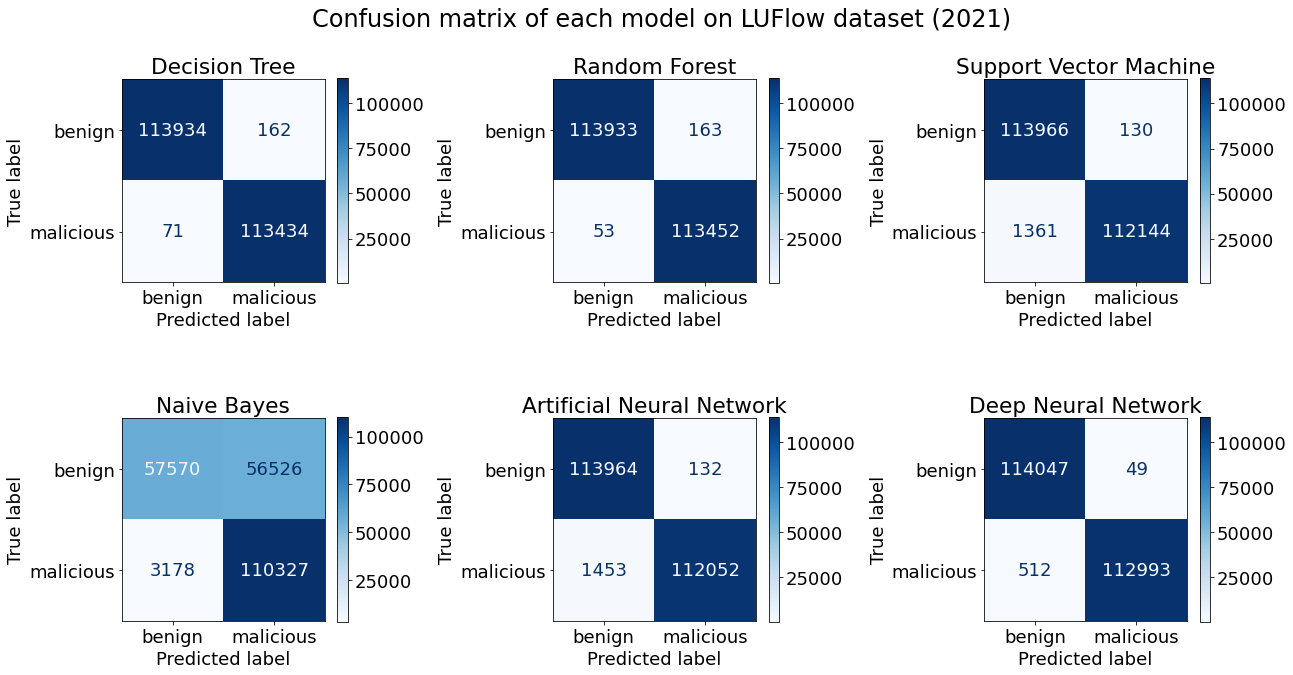

In [27]:
prediction_time = {}
accuracy_testing_dataset = {}
f_score_testing_dataset = {}

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (model, clf) in enumerate(trained_models.items()):
    clf = trained_models[model]

    prediction_start_time = process_time()
    prediction = clf.predict(luflow_2021_X_scaled)

    # save the time consumption for prediction
    prediction_time[model] = process_time() - prediction_start_time

    model_report = metrics.classification_report(luflow_2021_y, prediction, digits=4, output_dict=True)
    
    # save the accuracy and the f1-score of each model
    accuracy_testing_dataset[model] = model_report['accuracy']
    f_score_testing_dataset[model] = model_report['weighted avg']['f1-score']

    print(f"{'-'*25} {model} {'-'*25}")
    print(metrics.classification_report(luflow_2021_y, prediction, digits=4))

    plot_confusion_matrix(clf, 
                            luflow_2021_X_scaled, 
                            luflow_2021_y, 
                            cmap=plt.cm.Blues,
                            ax=axes[math.floor(i/3)][i%3])
    
    axes[math.floor(i/3)][i%3].set_title(model)


fig.subplots_adjust(hspace=0.65, wspace=0.7)
fig.suptitle('Confusion matrix of each model on LUFlow dataset (2021)', fontsize=24)

## Comparison

In this section, comparison between models will be done in terms of accuracy and f1-score. Besides that, the time consumed by each model for training and predicting the testing data will be compared. 

In [28]:
# define function to create label on top of the bars
def label_top(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height, f"{height:.2f}", ha='center', va='bottom')

### Accuracy

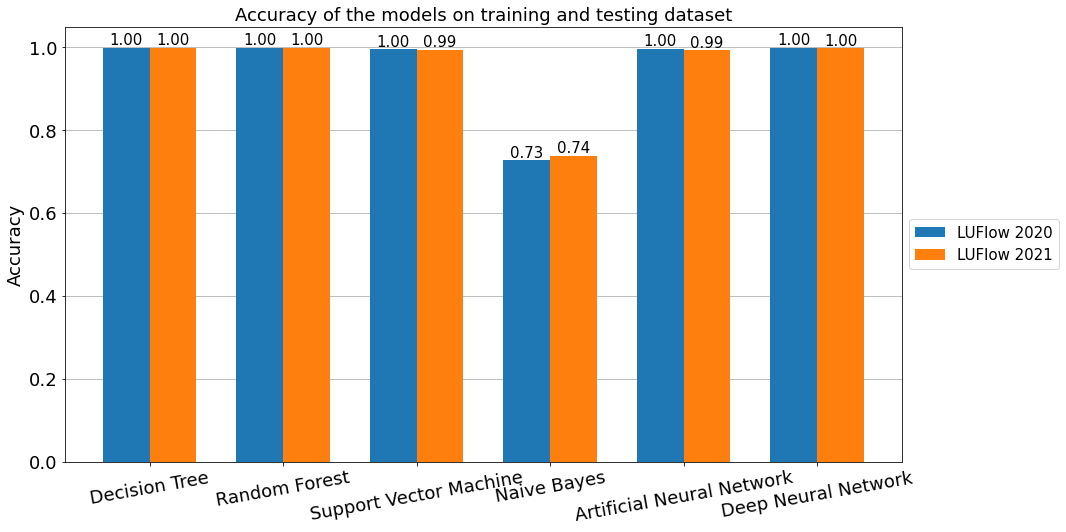

In [29]:
fig, ax = plt.subplots(figsize= (15, 8))
plt.rcParams.update({'font.size': 15})

x = np.arange(len(accuracy_train_dataset.keys())) # label location
width = 0.35 # width of the bar

bar1 = ax.bar(x - width/2, accuracy_train_dataset.values(), width, label='LUFlow 2020')
bar2 = ax.bar(x + width/2, accuracy_testing_dataset.values(), width, label='LUFlow 2021')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models on training and testing dataset')
ax.set_xticks(x)
ax.set_xticklabels(accuracy_train_dataset.keys())
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label
ax.grid(axis='y')
ax.set_axisbelow(True) # set the grid behind the bars

# put a legend to the right of the axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

label_top(bar1)
label_top(bar2)

plt.show()

### F1-score

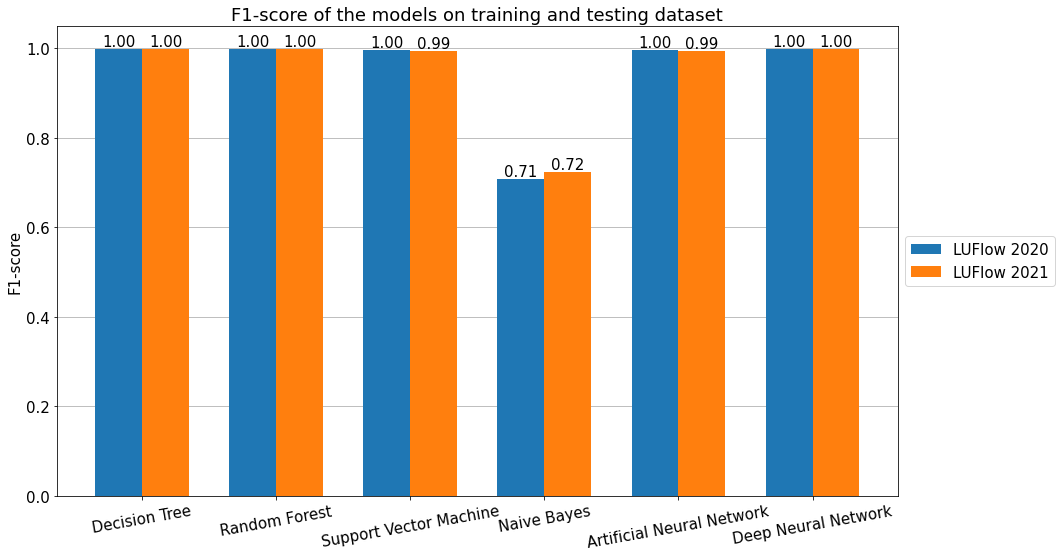

In [30]:
fig, ax = plt.subplots(figsize= (15, 8))
plt.rcParams.update({'font.size': 15})

x = np.arange(len(f_score_train_dataset.keys())) # label location
width = 0.35 # width of the bar

bar1 = ax.bar(x - width/2, f_score_train_dataset.values(), width, label='LUFlow 2020')
bar2 = ax.bar(x + width/2, f_score_testing_dataset.values(), width, label='LUFlow 2021')

ax.set_ylabel('F1-score')
ax.set_title('F1-score of the models on training and testing dataset')
ax.set_xticks(x)
ax.set_xticklabels(f_score_train_dataset.keys())
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label
ax.legend()
ax.grid(axis='y')
ax.set_axisbelow(True) # set the grid behind the bars

# put a legend to the right of the axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

label_top(bar1)
label_top(bar2)

fig.tight_layout()

plt.show()

### Time consumption for training

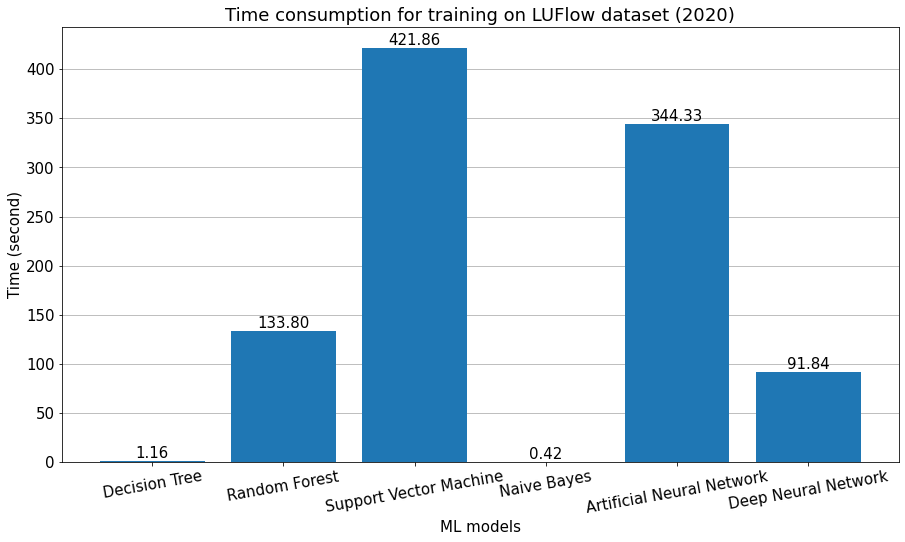

In [31]:
fig, ax = plt.subplots(figsize= (15, 8))

bar = ax.bar(training_time.keys(), training_time.values())
ax.set_xlabel("ML models")
ax.set_ylabel("Time (second)")
ax.set_title("Time consumption for training on LUFlow dataset (2020)")
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label
ax.grid(axis='y')
ax.set_axisbelow(True) # set the grid behind the bars

label_top(bar)

plt.show()

### Time consumption for prediction

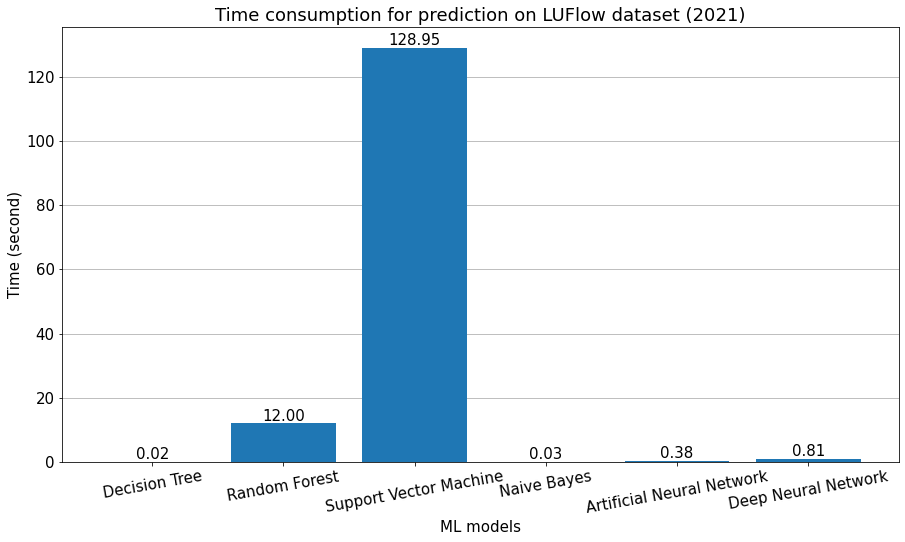

In [32]:
fig, ax = plt.subplots(figsize= (15, 8))

bar = ax.bar(prediction_time.keys(), prediction_time.values())
ax.set_xlabel("ML models")
ax.set_ylabel("Time (second)")
ax.set_title("Time consumption for prediction on LUFlow dataset (2021)")
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center')
ax.grid(axis='y')
ax.set_axisbelow(True) # set the grid behind the bars

label_top(bar)

plt.show()